In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

from matplotlib import font_manager, rc

from google.colab import drive
drive.mount('/content/gdriv')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

data_path = "/content/gdriv/My Drive/Colab Notebooks/Data" 

Mounted at /content/gdriv
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
Pop_F_01 = pd.read_csv(data_path + '/sk_flow_time.csv')
Pop_F_02 = pd.read_csv(data_path + '/sk_flow_age.csv')

Pop_F_01.head()

,Unnamed: 0,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,TMST_08,TMST_09,TMST_10,TMST_11,TMST_12,TMST_13,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,0,201902,20190201,1114052000,소공동,1496.35,1022.83,706.51,547.77,1673.02,3561.05,9195.82,27927.16,36659.41,15892.56,12480.58,12096.82,12500.02,13618.87,12355.91,13096.69,9317.64,15029.74,14135.83,9074.02,6032.26,6047.05,4806.65,2956.11
1,1,201902,20190201,1114054000,회현동,1692.37,1117.26,839.57,653.41,1920.52,4687.95,10936.47,27383.48,34842.48,21441.33,16609.73,19362.36,19509.21,19403.78,18210.30,20292.65,12527.29,21454.63,18214.50,11914.26,9800.64,9341.24,6884.91,4034.56
2,2,201902,20190201,1114055000,명동,2226.91,1726.10,1145.43,894.97,2513.32,5268.51,13857.93,39968.76,51536.22,26487.78,20804.34,23616.10,22517.30,21384.24,20332.71,21458.64,14434.56,25855.14,23107.23,13460.05,9797.40,8719.30,7203.45,4845.48
3,3,201902,20190201,1114057000,필동,698.73,440.70,385.99,275.64,497.41,1990.42,4679.79,12538.27,15883.98,8645.99,6594.13,6798.58,7707.22,7429.62,6900.66,9789.54,6205.74,13277.25,12101.51,5698.58,4464.46,4088.53,3385.14,1746.28
4,4,201902,20190201,1114058000,장충동,768.34,447.23,429.90,349.46,507.74,1310.67,2956.49,6409.78,7850.42,4923.87,4608.90,5104.75,4671.02,4688.82,5187.02,5211.60,3656.54,6841.98,5810.71,4463.99,2807.25,2626.12,2415.41,1398.94


In [ ]:
Pop_F_02.head()

,Unnamed: 0,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,MAN_FLOW_POP_CNT_3034,MAN_FLOW_POP_CNT_3539,MAN_FLOW_POP_CNT_4044,MAN_FLOW_POP_CNT_4549,MAN_FLOW_POP_CNT_5054,MAN_FLOW_POP_CNT_5559,MAN_FLOW_POP_CNT_6064,MAN_FLOW_POP_CNT_6569,MAN_FLOW_POP_CNT_70U,WMAN_FLOW_POP_CNT_0004,WMAN_FLOW_POP_CNT_0509,WMAN_FLOW_POP_CNT_1014,WMAN_FLOW_POP_CNT_1519,WMAN_FLOW_POP_CNT_2024,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,0,201902,20190201,1114052000,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,14249.35,16995.99,15538.23,18049.63,15506.88,13740.27,12896.62,9137.00,9882.67,2.18,149.24,533.18,2092.98,8543.04,13323.19,12741.15,11628.80,10006.80,9807.06,8099.38,7260.17,5757.53,3359.85,4431.71
1,1,201902,20190202,1114052000,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,7259.61,6721.80,5951.29,6651.69,6913.96,7257.67,7969.72,5785.80,6992.65,6.71,199.69,1070.10,1870.08,6000.59,7898.27,6580.27,5714.75,4946.22,5055.32,4560.27,4364.57,3838.77,2453.97,3207.26
2,2,201902,20190203,1114052000,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,5067.98,4761.52,3925.88,4702.36,4724.93,5005.20,5193.07,3675.38,3987.32,0.99,159.32,734.49,1351.48,3858.56,5079.63,4454.43,3905.32,3484.47,3703.24,3270.26,2984.05,2484.98,1511.67,1954.98
3,3,201902,20190204,1114052000,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,4508.23,4477.35,3914.24,4388.44,4585.60,4994.95,5105.00,3618.55,4013.40,0.05,163.55,870.36,1442.79,3155.11,4317.63,3676.47,3506.37,3108.99,3324.07,2841.35,2644.42,2164.35,1230.21,1520.35
4,4,201902,20190205,1114052000,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,5735.30,6318.20,5661.45,6527.92,6336.24,6028.84,5663.44,3576.67,3873.26,1.48,331.48,1654.40,2130.19,3667.01,4813.86,4967.92,5161.96,4856.63,5212.69,4462.94,4183.38,3265.62,1692.74,2147.09


In [ ]:
print('데이터 칼럼')
print(Pop_F_02.columns)
print('---------------------------------------------------')
print('---------------------------------------------------')
print('동별')
print(Pop_F_02['HDONG_NM'].unique())
print('---------------------------------------------------')
print('---------------------------------------------------')

데이터 칼럼
Index(['Unnamed: 0', 'STD_YM', 'STD_YMD', 'HDONG_CD', 'HDONG_NM',
       'MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U'],
      dtype='object')
------------------------------------

In [ ]:
Pop_F_02['STD_Y'] = Pop_F_02['STD_YMD'].astype(str).str.slice(0, 4)
Pop_F_02['STD_M'] = Pop_F_02['STD_YMD'].astype(str).str.slice(4, 6)
Pop_F_02['STD_D'] = Pop_F_02['STD_YMD'].astype(str).str.slice(6, 8)

Pop_F_02['STD_YMD'] = pd.to_datetime(Pop_F_02['STD_Y'] + '-' + Pop_F_02['STD_M'] + '-' + Pop_F_02['STD_D'])

Pop_F_02.head()

,Unnamed: 0,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,MAN_FLOW_POP_CNT_3034,MAN_FLOW_POP_CNT_3539,MAN_FLOW_POP_CNT_4044,MAN_FLOW_POP_CNT_4549,MAN_FLOW_POP_CNT_5054,MAN_FLOW_POP_CNT_5559,MAN_FLOW_POP_CNT_6064,MAN_FLOW_POP_CNT_6569,MAN_FLOW_POP_CNT_70U,WMAN_FLOW_POP_CNT_0004,WMAN_FLOW_POP_CNT_0509,WMAN_FLOW_POP_CNT_1014,WMAN_FLOW_POP_CNT_1519,WMAN_FLOW_POP_CNT_2024,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U,STD_Y,STD_M,STD_D
0,0,201902,2019-02-01,1114052000,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,14249.35,16995.99,15538.23,18049.63,15506.88,13740.27,12896.62,9137.00,9882.67,2.18,149.24,533.18,2092.98,8543.04,13323.19,12741.15,11628.80,10006.80,9807.06,8099.38,7260.17,5757.53,3359.85,4431.71,2019,02,01
1,1,201902,2019-02-02,1114052000,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,7259.61,6721.80,5951.29,6651.69,6913.96,7257.67,7969.72,5785.80,6992.65,6.71,199.69,1070.10,1870.08,6000.59,7898.27,6580.27,5714.75,4946.22,5055.32,4560.27,4364.57,3838.77,2453.97,3207.26,2019,02,02
2,2,201902,2019-02-03,1114052000,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,5067.98,4761.52,3925.88,4702.36,4724.93,5005.20,5193.07,3675.38,3987.32,0.99,159.32,734.49,1351.48,3858.56,5079.63,4454.43,3905.32,3484.47,3703.24,3270.26,2984.05,2484.98,1511.67,1954.98,2019,02,03
3,3,201902,2019-02-04,1114052000,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,4508.23,4477.35,3914.24,4388.44,4585.60,4994.95,5105.00,3618.55,4013.40,0.05,163.55,870.36,1442.79,3155.11,4317.63,3676.47,3506.37,3108.99,3324.07,2841.35,2644.42,2164.35,1230.21,1520.35,2019,02,04
4,4,201902,2019-02-05,1114052000,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,5735.30,6318.20,5661.45,6527.92,6336.24,6028.84,5663.44,3576.67,3873.26,1.48,331.48,1654.40,2130.19,3667.01,4813.86,4967.92,5161.96,4856.63,5212.69,4462.94,4183.38,3265.62,1692.74,2147.09,2019,02,05


In [ ]:
col = ['STD_YMD', 'HDONG_NM','MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U',
       'STD_M', 'STD_D']

# 보고싶은 열을 지정
POP_FLOW = Pop_F_02.loc[Pop_F_02['STD_Y'] == '2019', : ]
POP_FLOW = POP_FLOW.loc[:,col]
POP_FLOW

,STD_YMD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,MAN_FLOW_POP_CNT_3034,MAN_FLOW_POP_CNT_3539,MAN_FLOW_POP_CNT_4044,MAN_FLOW_POP_CNT_4549,MAN_FLOW_POP_CNT_5054,MAN_FLOW_POP_CNT_5559,MAN_FLOW_POP_CNT_6064,MAN_FLOW_POP_CNT_6569,MAN_FLOW_POP_CNT_70U,WMAN_FLOW_POP_CNT_0004,WMAN_FLOW_POP_CNT_0509,WMAN_FLOW_POP_CNT_1014,WMAN_FLOW_POP_CNT_1519,WMAN_FLOW_POP_CNT_2024,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U,STD_M,STD_D
0,2019-02-01,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,14249.35,16995.99,15538.23,18049.63,15506.88,13740.27,12896.62,9137.00,9882.67,2.18,149.24,533.18,2092.98,8543.04,13323.19,12741.15,11628.80,10006.80,9807.06,8099.38,7260.17,5757.53,3359.85,4431.71,02,01
1,2019-02-02,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,7259.61,6721.80,5951.29,6651.69,6913.96,7257.67,7969.72,5785.80,6992.65,6.71,199.69,1070.10,1870.08,6000.59,7898.27,6580.27,5714.75,4946.22,5055.32,4560.27,4364.57,3838.77,2453.97,3207.26,02,02
2,2019-02-03,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,5067.98,4761.52,3925.88,4702.36,4724.93,5005.20,5193.07,3675.38,3987.32,0.99,159.32,734.49,1351.48,3858.56,5079.63,4454.43,3905.32,3484.47,3703.24,3270.26,2984.05,2484.98,1511.67,1954.98,02,03
3,2019-02-04,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,4508.23,4477.35,3914.24,4388.44,4585.60,4994.95,5105.00,3618.55,4013.40,0.05,163.55,870.36,1442.79,3155.11,4317.63,3676.47,3506.37,3108.99,3324.07,2841.35,2644.42,2164.35,1230.21,1520.35,02,04
4,2019-02-05,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,5735.30,6318.20,5661.45,6527.92,6336.24,6028.84,5663.44,3576.67,3873.26,1.48,331.48,1654.40,2130.19,3667.01,4813.86,4967.92,5161.96,4856.63,5212.69,4462.94,4183.38,3265.62,1692.74,2147.09,02,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,2019-05-27,고산3동,0.00,160.91,604.28,994.41,1305.36,1679.60,1724.78,2341.96,2535.05,3252.15,3142.83,2823.25,2197.67,1284.78,1288.68,0.00,191.73,597.81,942.16,1328.25,1293.00,1219.20,2060.05,2477.49,3098.19,2682.04,2221.13,1642.78,870.96,1050.98,05,27
8276,2019-05-28,고산3동,0.00,151.66,617.83,963.84,1291.84,1716.82,1709.87,2381.82,2616.57,3318.70,3319.47,3041.42,2450.67,1575.70,1692.23,0.00,202.35,596.04,1001.16,1365.64,1246.48,1256.09,2117.50,2613.45,3165.19,2719.53,2301.41,1805.31,974.83,1131.32,05,28
8277,2019-05-29,고산3동,0.00,147.68,675.46,1006.99,1319.99,1721.71,1737.97,2361.76,2659.08,3548.10,3431.31,3115.03,2455.18,1494.85,1611.81,0.00,243.00,699.65,1016.08,1433.33,1290.70,1352.54,2094.42,2697.13,3272.91,2804.82,2281.15,1747.05,1019.86,1105.85,05,29
8278,2019-05-30,고산3동,0.00,150.40,599.51,978.03,1231.77,1783.48,1771.25,2408.15,2703.92,3514.47,3522.74,3051.26,2447.14,1573.72,1632.55,0.09,201.36,626.53,1006.31,1399.23,1318.74,1273.07,2152.81,2671.58,3227.70,2734.36,2285.55,1702.65,989.13,1190.72,05,30


In [ ]:
POP_FLOW['days'] = 0
for i in range(len(POP_FLOW)):
  if POP_FLOW['STD_M'][i] == '02':
    POP_FLOW['days'][i] = 0
    POP_FLOW['days'][i] = POP_FLOW['days'][i] + int(POP_FLOW['STD_D'][i])
  elif POP_FLOW['STD_M'][i] == '03':
    POP_FLOW['days'][i] = 28
    POP_FLOW['days'][i] = POP_FLOW['days'][i] + int(POP_FLOW['STD_D'][i])
  elif POP_FLOW['STD_M'][i] == '04':
    POP_FLOW['days'][i] = 28 + 31
    POP_FLOW['days'][i] = POP_FLOW['days'][i] + int(POP_FLOW['STD_D'][i])
  elif POP_FLOW['STD_M'][i] == '05':
    POP_FLOW['days'][i] = 28 + 31 + 30
    POP_FLOW['days'][i] = POP_FLOW['days'][i] + int(POP_FLOW['STD_D'][i])
    
POP_FLOW

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launche

,STD_YMD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,MAN_FLOW_POP_CNT_3034,MAN_FLOW_POP_CNT_3539,MAN_FLOW_POP_CNT_4044,MAN_FLOW_POP_CNT_4549,MAN_FLOW_POP_CNT_5054,MAN_FLOW_POP_CNT_5559,MAN_FLOW_POP_CNT_6064,MAN_FLOW_POP_CNT_6569,MAN_FLOW_POP_CNT_70U,WMAN_FLOW_POP_CNT_0004,WMAN_FLOW_POP_CNT_0509,WMAN_FLOW_POP_CNT_1014,WMAN_FLOW_POP_CNT_1519,WMAN_FLOW_POP_CNT_2024,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U,STD_M,STD_D,days
0,2019-02-01,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,14249.35,16995.99,15538.23,18049.63,15506.88,13740.27,12896.62,9137.00,9882.67,2.18,149.24,533.18,2092.98,8543.04,13323.19,12741.15,11628.80,10006.80,9807.06,8099.38,7260.17,5757.53,3359.85,4431.71,02,01,1
1,2019-02-02,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,7259.61,6721.80,5951.29,6651.69,6913.96,7257.67,7969.72,5785.80,6992.65,6.71,199.69,1070.10,1870.08,6000.59,7898.27,6580.27,5714.75,4946.22,5055.32,4560.27,4364.57,3838.77,2453.97,3207.26,02,02,2
2,2019-02-03,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,5067.98,4761.52,3925.88,4702.36,4724.93,5005.20,5193.07,3675.38,3987.32,0.99,159.32,734.49,1351.48,3858.56,5079.63,4454.43,3905.32,3484.47,3703.24,3270.26,2984.05,2484.98,1511.67,1954.98,02,03,3
3,2019-02-04,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,4508.23,4477.35,3914.24,4388.44,4585.60,4994.95,5105.00,3618.55,4013.40,0.05,163.55,870.36,1442.79,3155.11,4317.63,3676.47,3506.37,3108.99,3324.07,2841.35,2644.42,2164.35,1230.21,1520.35,02,04,4
4,2019-02-05,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,5735.30,6318.20,5661.45,6527.92,6336.24,6028.84,5663.44,3576.67,3873.26,1.48,331.48,1654.40,2130.19,3667.01,4813.86,4967.92,5161.96,4856.63,5212.69,4462.94,4183.38,3265.62,1692.74,2147.09,02,05,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,2019-05-27,고산3동,0.00,160.91,604.28,994.41,1305.36,1679.60,1724.78,2341.96,2535.05,3252.15,3142.83,2823.25,2197.67,1284.78,1288.68,0.00,191.73,597.81,942.16,1328.25,1293.00,1219.20,2060.05,2477.49,3098.19,2682.04,2221.13,1642.78,870.96,1050.98,05,27,116
8276,2019-05-28,고산3동,0.00,151.66,617.83,963.84,1291.84,1716.82,1709.87,2381.82,2616.57,3318.70,3319.47,3041.42,2450.67,1575.70,1692.23,0.00,202.35,596.04,1001.16,1365.64,1246.48,1256.09,2117.50,2613.45,3165.19,2719.53,2301.41,1805.31,974.83,1131.32,05,28,117
8277,2019-05-29,고산3동,0.00,147.68,675.46,1006.99,1319.99,1721.71,1737.97,2361.76,2659.08,3548.10,3431.31,3115.03,2455.18,1494.85,1611.81,0.00,243.00,699.65,1016.08,1433.33,1290.70,1352.54,2094.42,2697.13,3272.91,2804.82,2281.15,1747.05,1019.86,1105.85,05,29,118
8278,2019-05-30,고산3동,0.00,150.40,599.51,978.03,1231.77,1783.48,1771.25,2408.15,2703.92,3514.47,3522.74,3051.26,2447.14,1573.72,1632.55,0.09,201.36,626.53,1006.31,1399.23,1318.74,1273.07,2152.81,2671.58,3227.70,2734.36,2285.55,1702.65,989.13,1190.72,05,30,119


In [ ]:
POP_FLOW['3'] = 3
POP_FLOW['7'] = 7
POP_FLOW['days'] = POP_FLOW['days'] - POP_FLOW['3']
POP_FLOW = POP_FLOW.loc[POP_FLOW['days']>=0,:]
POP_FLOW = POP_FLOW.loc[POP_FLOW['days']<=111,:]
POP_FLOW['WEEK'] = (POP_FLOW['days'] / POP_FLOW['7']).astype(int) + 1
POP_FLOW['DAY'] = POP_FLOW['days'] % POP_FLOW['7']

In [ ]:
data_19 = POP_FLOW

In [ ]:
week_01 = data_19.loc[data_19['WEEK'] == 1, :]
week_02 = data_19.loc[data_19['WEEK'] == 2, :]
week_03 = data_19.loc[data_19['WEEK'] == 3, :]
week_04 = data_19.loc[data_19['WEEK'] == 4, :]
week_05 = data_19.loc[data_19['WEEK'] == 5, :]
week_06 = data_19.loc[data_19['WEEK'] == 6, :]
week_07 = data_19.loc[data_19['WEEK'] == 7, :]
week_08 = data_19.loc[data_19['WEEK'] == 8, :]
week_09 = data_19.loc[data_19['WEEK'] == 9, :]
week_10 = data_19.loc[data_19['WEEK'] == 10, :]
week_11 = data_19.loc[data_19['WEEK'] == 11, :]
week_12 = data_19.loc[data_19['WEEK'] == 12, :]
week_13 = data_19.loc[data_19['WEEK'] == 13, :]
week_14 = data_19.loc[data_19['WEEK'] == 14, :]
week_15 = data_19.loc[data_19['WEEK'] == 15, :]
week_16 = data_19.loc[data_19['WEEK'] == 16, :]

print(week_01.head())
print(week_02.head())
print(week_03.head())
print(week_04.head())
print(week_05.head())
print(week_06.head())
print(week_07.head())
print(week_08.head())
print(week_09.head())
print(week_10.head())
print(week_11.head())
print(week_12.head())
print(week_13.head())
print(week_14.head())
print(week_15.head())
print(week_16.head())

     STD_YMD HDONG_NM  MAN_FLOW_POP_CNT_0004  ...  7  WEEK  DAY
2 2019-02-03      소공동                   1.38  ...  7     1    0
3 2019-02-04      소공동                   0.08  ...  7     1    1
4 2019-02-05      소공동                   0.00  ...  7     1    2
5 2019-02-06      소공동                  11.77  ...  7     1    3
6 2019-02-07      소공동                   7.59  ...  7     1    4

[5 rows x 39 columns]
      STD_YMD HDONG_NM  MAN_FLOW_POP_CNT_0004  ...  7  WEEK  DAY
9  2019-02-10      소공동                   0.89  ...  7     2    0
10 2019-02-11      소공동                  14.25  ...  7     2    1
11 2019-02-12      소공동                   5.09  ...  7     2    2
12 2019-02-13      소공동                  12.74  ...  7     2    3
13 2019-02-14      소공동                   8.64  ...  7     2    4

[5 rows x 39 columns]
      STD_YMD HDONG_NM  MAN_FLOW_POP_CNT_0004  ...  7  WEEK  DAY
16 2019-02-17      소공동                   0.20  ...  7     3    0
17 2019-02-18      소공동                   0.07  ...

In [ ]:
period_01 = pd.concat([week_01, week_02, week_03, week_04], axis = 0)
period_02 = pd.concat([week_05, week_06, week_07, week_08], axis = 0)
period_03 = pd.concat([week_09, week_10, week_11, week_12], axis = 0)
period_04 = pd.concat([week_13, week_14, week_15, week_16], axis = 0)

In [ ]:
# 유동인구 총합 계산
col_pop = ['MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509',
       'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519',
       'MAN_FLOW_POP_CNT_2024', 'MAN_FLOW_POP_CNT_2529',
       'MAN_FLOW_POP_CNT_3034', 'MAN_FLOW_POP_CNT_3539',
       'MAN_FLOW_POP_CNT_4044', 'MAN_FLOW_POP_CNT_4549',
       'MAN_FLOW_POP_CNT_5054', 'MAN_FLOW_POP_CNT_5559',
       'MAN_FLOW_POP_CNT_6064', 'MAN_FLOW_POP_CNT_6569',
       'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004',
       'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014',
       'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024',
       'WMAN_FLOW_POP_CNT_2529', 'WMAN_FLOW_POP_CNT_3034',
       'WMAN_FLOW_POP_CNT_3539', 'WMAN_FLOW_POP_CNT_4044',
       'WMAN_FLOW_POP_CNT_4549', 'WMAN_FLOW_POP_CNT_5054',
       'WMAN_FLOW_POP_CNT_5559', 'WMAN_FLOW_POP_CNT_6064',
       'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U']

pop1 = period_01.loc[:,col_pop].sum(axis = 1)

pop1 = pd.DataFrame(pop1, columns = ['SUM_FLOW'])

weeksum_01 = pd.concat([period_01.iloc[:, 0:2], pop1], axis = 1)
#SUM_FLOW1 = SUM_FLOW1
weeksum_01 = weeksum_01.groupby(['STD_YMD', 'HDONG_NM']).sum()
weeksum_01['DL_YMD'] = [i[0] for i in weeksum_01.index]
weeksum_01['HDNG_NM'] = [i[1] for i in weeksum_01.index]


pop2 = period_02.loc[:,col_pop].sum(axis = 1)

pop2 = pd.DataFrame(pop2, columns = ['SUM_FLOW'])

weeksum_02 = pd.concat([period_02.iloc[:, 0:2], pop1], axis = 1)
#SUM_FLOW1 = SUM_FLOW1
weeksum_02 = weeksum_02.groupby(['STD_YMD', 'HDONG_NM']).sum()
weeksum_02['DL_YMD'] = [i[0] for i in weeksum_02.index]
weeksum_02['HDNG_NM'] = [i[1] for i in weeksum_02.index]

pop3 = period_03.loc[:,col_pop].sum(axis = 1)

pop3 = pd.DataFrame(pop3, columns = ['SUM_FLOW'])

weeksum_03 = pd.concat([period_03.iloc[:, 0:2], pop3], axis = 1)
#SUM_FLOW1 = SUM_FLOW1
weeksum_03 = weeksum_03.groupby(['STD_YMD', 'HDONG_NM']).sum()
weeksum_03['DL_YMD'] = [i[0] for i in weeksum_03.index]
weeksum_03['HDNG_NM'] = [i[1] for i in weeksum_03.index]

pop4 = period_04.loc[:,col_pop].sum(axis = 1)

pop4 = pd.DataFrame(pop4, columns = ['SUM_FLOW'])

weeksum_04 = pd.concat([period_04.iloc[:, 0:2], pop4], axis = 1)
#SUM_FLOW1 = SUM_FLOW1
weeksum_04 = weeksum_04.groupby(['STD_YMD', 'HDONG_NM']).sum()
weeksum_04['DL_YMD'] = [i[0] for i in weeksum_04.index]
weeksum_04['HDNG_NM'] = [i[1] for i in weeksum_04.index]
weeksum_04

SUM_FLOW     DL_YMD HDNG_NM
STD_YMD    HDONG_NM                              
2019-04-28 고산1동      122461.58 2019-04-28    고산1동
           고산2동      259048.27 2019-04-28    고산2동
           고산3동       43871.36 2019-04-28    고산3동
           공릉1동      140767.22 2019-04-28    공릉1동
           공릉2동      169008.12 2019-04-28    공릉2동
...                        ...        ...     ...
2019-05-25 하계2동       76402.89 2019-05-25    하계2동
           황금1동       52752.49 2019-05-25    황금1동
           황금2동       66836.99 2019-05-25    황금2동
           황학동        53390.80 2019-05-25     황학동
           회현동       256966.12 2019-05-25     회현동

[1932 rows x 3 columns]

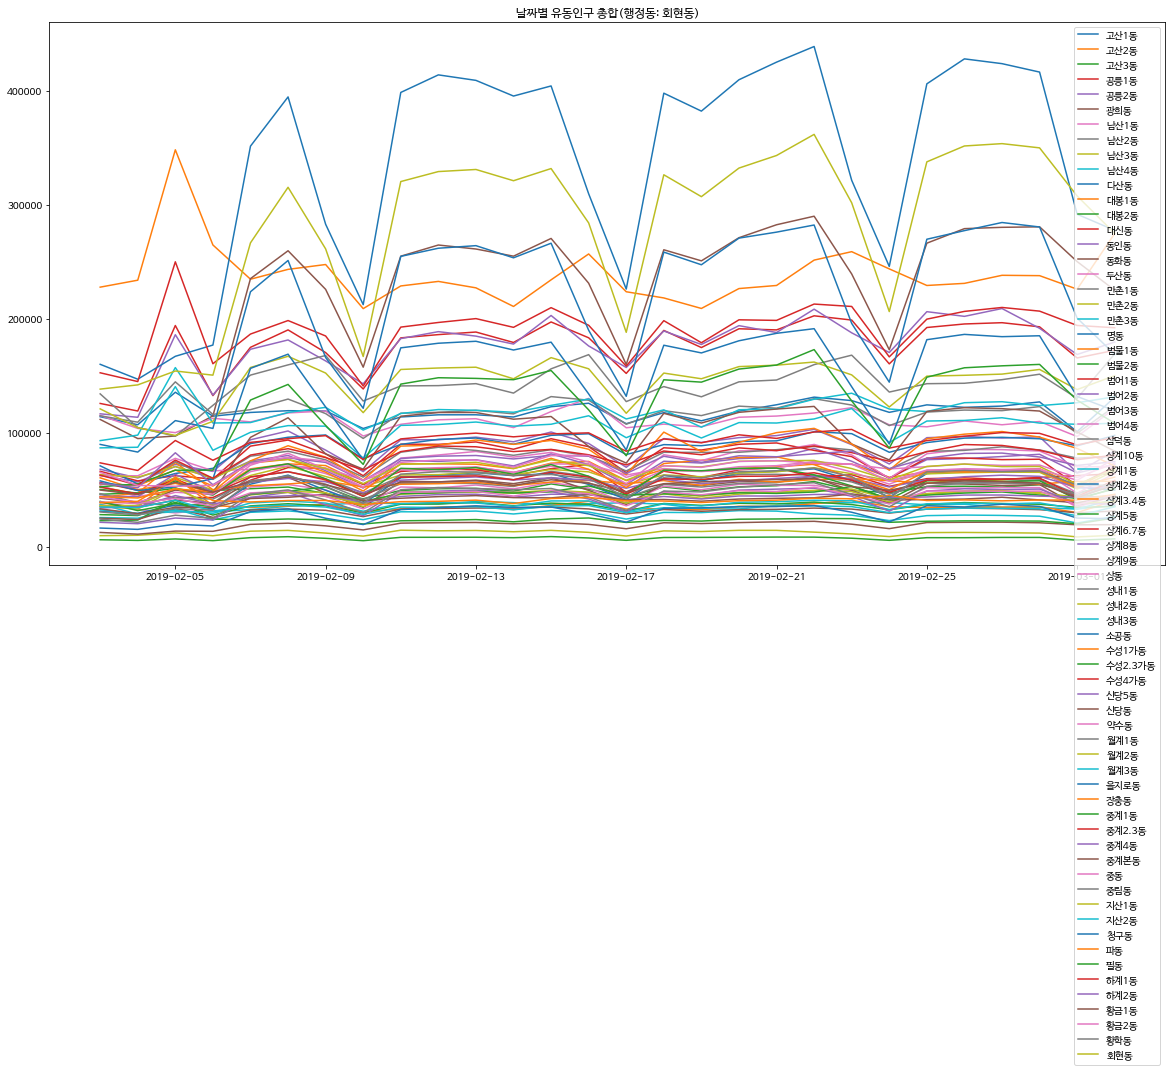

In [ ]:

idx = SUM_FLOW1['HDNG_NM'].unique()
for i in SUM_FLOW1['HDNG_NM'].unique():
    plt.rcParams['figure.figsize'] = (20, 10)
    rows = (SUM_FLOW1['HDNG_NM'] == i)
    
    plt.plot(SUM_FLOW1.loc[rows, 'DL_YMD'], SUM_FLOW1.loc[rows, 'SUM_FLOW'])
    
    plt.title('날짜별 유동인구 총합(행정동: ' + i + ')')

    plt.legend(idx)

plt.show()

In [ ]:
p1 = []
for i in weeksum_01['HDNG_NM'].unique():
  rows = (weeksum_01['HDNG_NM']==i)
  p1.append(np.array(weeksum_01.loc[rows, 'SUM_FLOW'].transpose().tolist()))

p2 = []
for i in weeksum_02['HDNG_NM'].unique():
  rows = (weeksum_02['HDNG_NM']==i)
  p2.append(np.array(weeksum_02.loc[rows, 'SUM_FLOW'].transpose().tolist()))

p3 = []
for i in weeksum_03['HDNG_NM'].unique():
  rows = (weeksum_03['HDNG_NM']==i)
  p3.append(np.array(weeksum_03.loc[rows, 'SUM_FLOW'].transpose().tolist()))

p4 = []
for i in weeksum_04['HDNG_NM'].unique():
  rows = (weeksum_04['HDNG_NM']==i)
  p4.append(np.array(weeksum_04.loc[rows, 'SUM_FLOW'].transpose().tolist()))
#  p1 = p1.append(weeksum_01.loc[rows, 'INVC_CONT'].tolist())
#  P1 = P1.append(weeksum_01.loc[rows, 'INVC_CONT'], ignore_index = True)
#P1.values
p1 = np.array(p1)
p2 = np.array(p2)
p3 = np.array(p3)
p4 = np.array(p4)
p0 = p1 + p2 + p3 + p4
p0

array([[354086.35      , 337327.97      , 380533.4       , ...,
        374387.06      , 367003.39      , 428758.4       ],
       [727134.81      , 626466.88      , 774902.06      , ...,
        726418.36000001, 721727.96000001, 933904.21      ],
       [140197.84      , 138572.84      , 154408.87      , ...,
        153052.89      , 148915.54      , 159932.18      ],
       ...,
       [189371.22      , 174224.65      , 177538.5       , ...,
        188909.14      , 181648.57      , 219213.78      ],
       [112038.62      , 137238.61      , 147544.26      , ...,
        186703.13      , 177710.29      , 161611.84      ],
       [507234.1       , 694085.79      , 722999.26      , ...,
        952090.58      , 939475.38      , 803672.94      ]])

In [ ]:
P0 = pd.DataFrame(p0)
#P1 = pd.DataFrame(p1)
#P2 = pd.DataFrame(p2)
#P3 = pd.DataFrame(p3)
#P4 = pd.DataFrame(p4)
P0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,354086.35,337327.97,380533.40,363792.53,380202.29,387658.43,401752.02,345569.93,365087.61,369862.76,364061.07,375680.56,385262.06,395445.19,345527.78,362812.10,356273.32,367599.86,371341.91,385539.35,382429.07,341302.02,364663.18,363968.93,364268.89,374387.06,367003.39,428758.40
1,727134.81,626466.88,774902.06,710363.98,699217.80,722349.74,795469.03,680841.88,689632.40,684428.32,668404.20,664350.26,753290.20,906710.70,786346.02,641243.55,638624.00,666170.57,660158.46,710348.35,753683.50,712296.57,645523.65,685191.83,736666.43,726418.36,721727.96,933904.21
2,140197.84,138572.84,154408.87,147627.42,156087.63,163229.22,153779.48,136790.77,152169.94,152234.69,152050.87,151102.88,161004.15,151027.42,133337.20,150387.43,146578.94,152221.96,151778.88,159826.60,145104.85,133714.60,149338.83,148697.51,149348.74,153052.89,148915.54,159932.18
3,429890.09,454651.41,544237.84,462253.24,538296.16,566420.36,512699.24,437089.37,518911.98,549521.58,560946.31,545865.19,564037.78,539329.18,428576.44,546332.68,540876.84,561826.98,553304.78,570243.89,547202.92,436864.19,546561.48,562082.92,563977.19,562525.60,544838.51,553373.90
4,467075.66,508261.33,593825.38,523578.09,600090.01,589136.33,499698.15,468206.10,563671.95,611402.31,621801.82,607822.07,617979.24,550212.50,475687.81,611935.89,624145.60,641371.87,635273.91,642306.90,569516.70,485345.72,632304.70,644454.63,651267.51,625898.63,589419.01,560531.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,189575.56,191283.48,229689.41,195181.28,224015.83,238191.76,226763.71,190487.51,216205.91,233142.26,234266.99,226536.19,233892.66,237322.43,186682.42,225784.75,226883.84,230815.35,226690.17,232826.16,234916.25,188374.98,220968.31,233838.46,230493.00,224324.81,222992.72,232733.20
65,170950.76,199944.59,206350.68,202006.39,214626.41,185062.97,164935.74,142618.20,158712.92,164334.54,165996.82,159622.44,168024.38,162884.10,140610.44,161609.12,162657.29,164580.03,163207.67,166596.48,154974.69,137069.07,157681.99,162245.46,156954.91,154791.47,143692.03,191436.53
66,189371.22,174224.65,177538.50,177827.77,204270.99,216847.08,221078.96,184703.64,201505.36,201100.27,203987.83,193514.50,210128.72,221141.61,168143.00,193768.40,192343.68,203707.78,199710.19,201177.21,211555.17,165013.26,189542.67,191246.46,184437.50,188909.14,181648.57,219213.78
67,112038.62,137238.61,147544.26,138417.96,179080.82,187804.87,158726.66,117233.71,165690.58,186464.62,187218.28,186466.92,190958.78,166985.32,115304.15,181226.10,182612.63,187479.38,189143.35,193906.76,166426.01,112394.88,180459.23,184643.30,186434.49,186703.13,177710.29,161611.84


In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_train = minmax_scale(P0, axis=1, copy=True)
scaled_train

array([[0.18329106, 0.        , 0.47254978, ..., 0.40532556, 0.32456831,
        1.        ],
       [0.32744212, 0.        , 0.48281443, ..., 0.32511172, 0.30985528,
        1.        ],
       [0.2295141 , 0.17515176, 0.70492626, ..., 0.65956366, 0.52115381,
        0.88970167],
       ...,
       [0.43396893, 0.16411297, 0.22315354, ..., 0.42573637, 0.29637982,
        0.96565319],
       [0.        , 0.30781193, 0.43369301, ..., 0.91200936, 0.80216394,
        0.60552518],
       [0.00576028, 0.38867035, 0.44792194, ..., 0.91739253, 0.89154054,
        0.61324431]])

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
res = model.fit(scaled_train)

In [ ]:
res.score(scaled_train)

-28.62684255833024

In [ ]:
score = []
for i in range(2,30):
  model = KMeans(n_clusters=i)
  res = model.fit(scaled_train)
  score.append(res.score(scaled_train))
print(score)

[-42.45423702085254, -33.64194971736021, -28.74216006370498, -24.902527643588034, -22.414793234234086, -20.242596725734955, -18.375561548696012, -17.03898748140746, -16.515962396775464, -14.941973228290996, -14.601615480712288, -13.361472550597087, -12.411634817386576, -12.016742043717857, -11.084441632459937, -10.72885579186265, -10.54241095709423, -9.34997236692685, -9.057189549240544, -8.85165705430777, -8.236280575668955, -7.467484846515826, -7.29752539684556, -6.862873311489166, -6.4268859140039565, -6.122701892194878, -5.73564174197184, -5.377088469052174]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


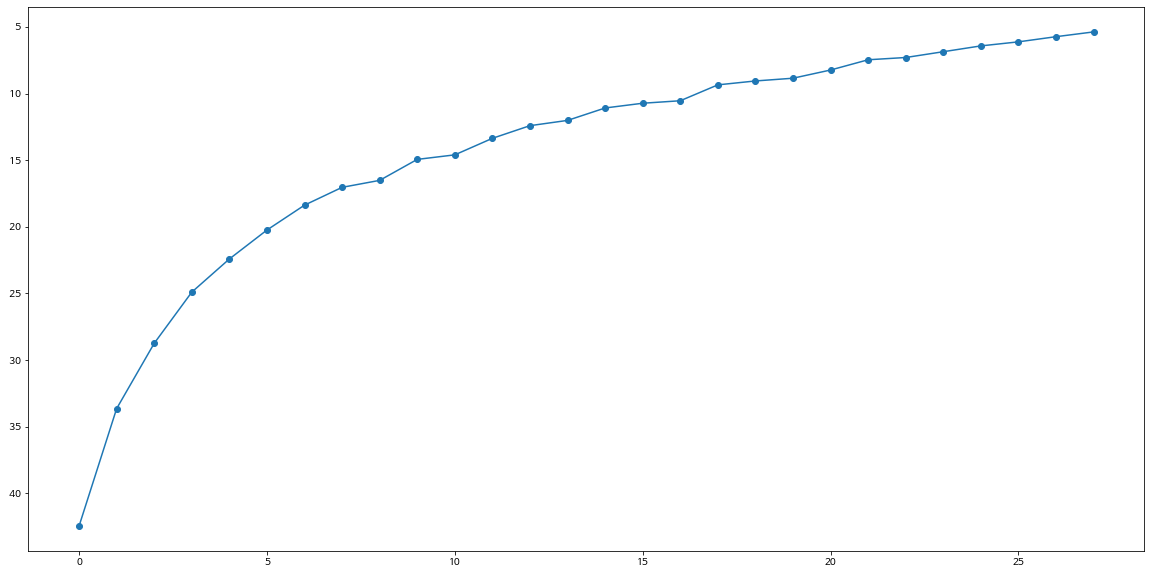

In [ ]:
plt.plot(score, marker = 'o')

In [ ]:
model = KMeans(n_clusters=4)

In [ ]:
res = model.fit(scaled_train)

res.labels_

array([1, 1, 0, 2, 2, 2, 2, 0, 0, 3, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1,
       1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 3, 3, 2, 1, 2, 2, 2, 3,
       0, 2, 2], dtype=int32)

In [ ]:
name = pd.DataFrame(weeksum_01['HDNG_NM'].unique()).reset_index(drop=True)
cluster_res = pd.concat([name,pd.DataFrame(res.labels_)],axis=1)
cluster_res.columns = ['name','cluster']
cluster_res

,name,cluster
0,고산1동,1
1,고산2동,1
2,고산3동,0
3,공릉1동,2
4,공릉2동,2
...,...,...
64,하계2동,2
65,황금1동,3
66,황금2동,0
67,황학동,2


In [ ]:
cluster_dt = pd.concat([cluster_res,pd.DataFrame(scaled_train)],axis=1)
print(cluster_dt)

    name  cluster         0         1  ...        24        25        26        27
0   고산1동        1  0.183291  0.000000  ...  0.294660  0.405326  0.324568  1.000000
1   고산2동        1  0.327442  0.000000  ...  0.358446  0.325112  0.309855  1.000000
2   고산3동        0  0.229514  0.175152  ...  0.535646  0.659564  0.521154  0.889702
3   공릉1동        2  0.009273  0.184058  ...  0.955765  0.945518  0.820669  0.880918
4   공릉2동        2  0.000000  0.223602  ...  1.000000  0.862269  0.664217  0.507381
..   ...      ...       ...       ...  ...       ...       ...       ...       ...
64  하계2동        2  0.056167  0.089325  ...  0.850537  0.730788  0.704927  0.894028
65  황금1동        3  0.436860  0.810697  ...  0.256402  0.228507  0.085394  0.700997
66  황금2동        0  0.433969  0.164113  ...  0.346068  0.425736  0.296380  0.965653
67   황학동        2  0.000000  0.307812  ...  0.908728  0.912009  0.802164  0.605525
68   회현동        2  0.005760  0.388670  ...  0.907945  0.917393  0.891541  0.613244

[69

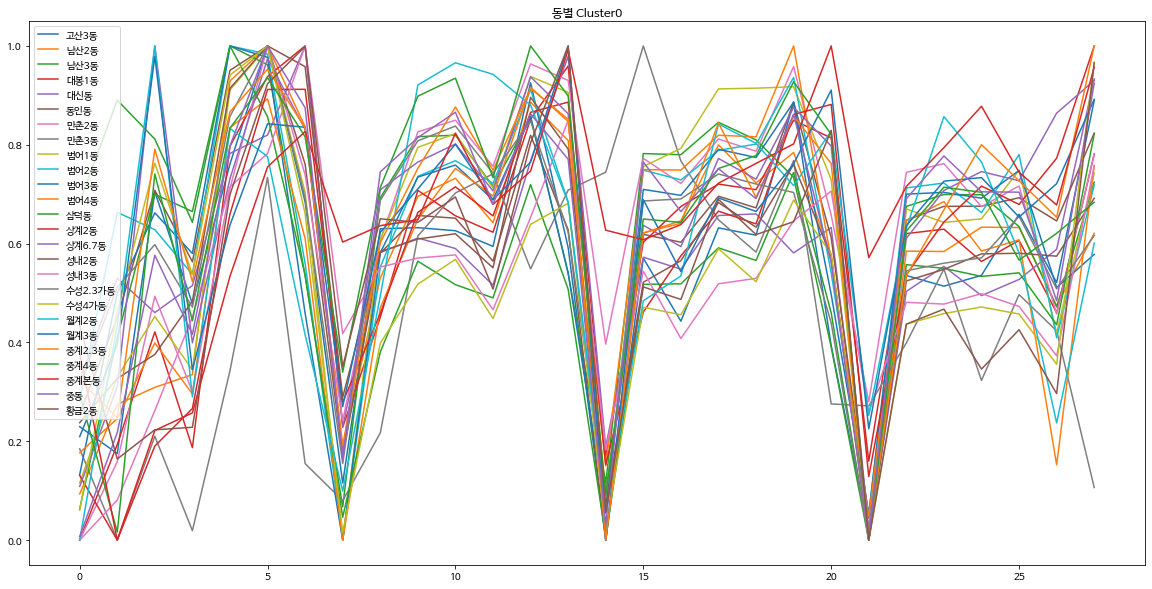

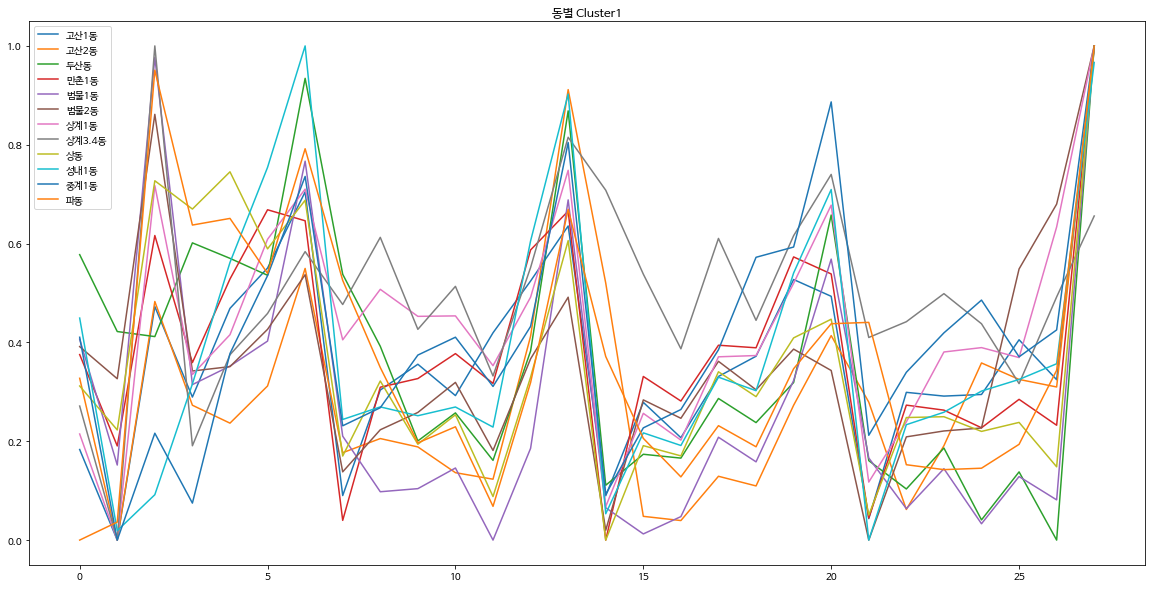

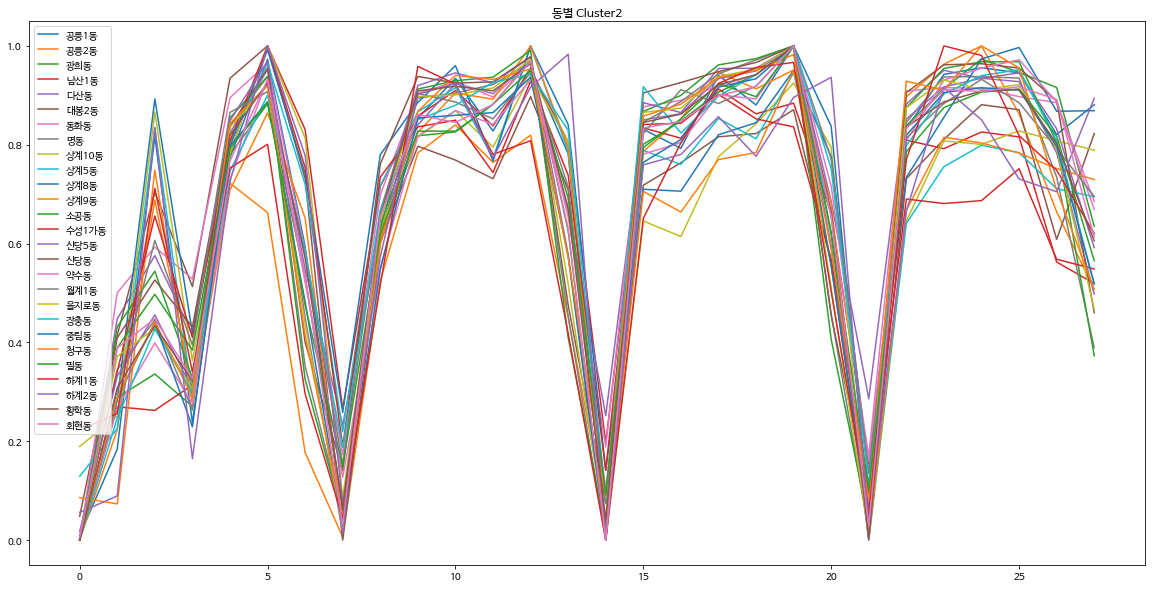

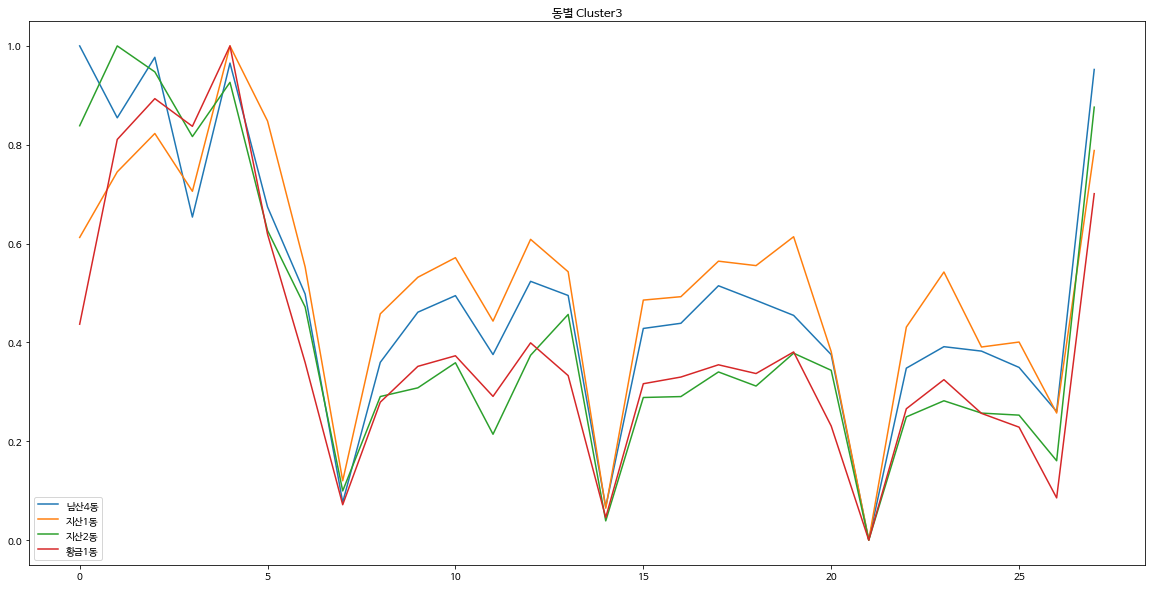

In [ ]:
for k in range(4): # k는 군집수
  cluster0 = cluster_dt.loc[cluster_dt['cluster']==k,:]
  idx = cluster0['name']
  cluster = cluster0.iloc[:,2:].reset_index(drop=True)
  for i in range(len(cluster)):
    plt.plot(cluster.iloc[i,:])
  plt.title('동별 Cluster' + str(k))
  plt.legend(idx)
  plt.show()